# EXPLORATORY DATA ANALYSIS

In this notebook I perform Exploratory Data Analysis on dataset, containing body and physical performance measurements.

В этом ноутбуке я проведу исследовательский анализ данных по набору данных, содержащему измерения тела и показатели физической активности. 

Import all needed modules

Импорт модулей для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings( "ignore" )

Import the dataset

Импорт датасета

In [2]:
body_perf_df=pd.read_csv('bodyPerformance.csv')

Let's check out what is in our dataset

Посмотрим на данные, которые датасет в себе содержит

In [3]:
body_perf_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
body_perf_df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Dataset is precleaned, so we don't get nulls. This means we can get straight to working with data.

В датасете нет пропущенных значений или нулей, значит мы можем переходить к работе с данными без их обработки.

Since dataset contains gender column, I want to see how the data point are distributed between the two.
Also, let's check how data points are spread between four classes.

Датасет содержит в себе колонку под названием "пол", поэтому интересно было бы узнать как дата поинты распределены между полами.
Также я хочу узнать, как дата поинты распределены между четерьмя классами.

In [5]:
print('gender: ')
print(body_perf_df['gender'].value_counts())
print('classes: ')
print(body_perf_df['class'].value_counts())

gender: 
M    8467
F    4926
Name: gender, dtype: int64
classes: 
D    3349
C    3349
A    3348
B    3347
Name: class, dtype: int64


Dataset has double number of data points with '*M*' gender assigned than with '*F*' gender assigned. 
This could cause a problem if class assignment relies heavily on the gender variable.
Let's check this out.

В датасете содержится примерно в два раза больше дата поинтов с '*M*' полом, чем с '*F*' полом.
Это может стать проблемой, если определение класса сильно зависит от показателя пола. Давайте, проверим.

In [6]:
gender_class_df = pd.DataFrame()

classes = ['A', 'B', 'C', 'D']
for i in classes:
    gender_class_df[i] = body_perf_df[body_perf_df['class'] == i]['gender'].value_counts()
    print(i)
    print(body_perf_df[body_perf_df['class'] == i]['gender'].value_counts())

A
M    1864
F    1484
Name: gender, dtype: int64
B
M    2162
F    1185
Name: gender, dtype: int64
C
M    2237
F    1112
Name: gender, dtype: int64
D
M    2204
F    1145
Name: gender, dtype: int64


<AxesSubplot:>

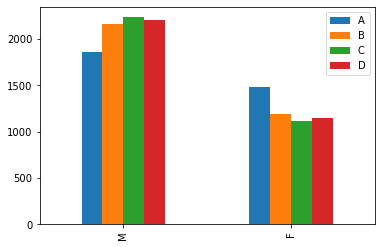

In [7]:
gender_class_df.plot.bar()

Classes seem to be distributed between genders without any connection. 
Though, '*M*' gender seem to have more lower score classes (*C/D*), while '*F*' gender has more data points assigned to '*A*' class.
Let's run some statistics to see if these two are correlated.

По числовым показателям и гистограмме можно заключить, что назначение класса не зависит от пола.
Однако, дата поинты '*M*' чаще отнесены с классам (*C/D*), в то время как дата поинты '*F*' пола чаще относятся к '*A*' классу.
Необходимо сделать статистический тест, чтобы убедиться, что два показателя не связаны.

In [8]:
def class_cat(df):
    if df['class'] == 'A':
        return 1
    elif df['class'] == 'B':
        return 2
    elif df['class'] == 'C':
        return 3
    else:
        return 4
    
body_perf_df['class_encode'] = body_perf_df.apply(class_cat, axis=1)

In [9]:
def gender_cat(df):
    if df['gender'] == 'F':
        return 1
    else:
        return 0
    
body_perf_df['gender_encode'] = body_perf_df.apply(gender_cat, axis=1)

In [10]:
body_hypo_test_df = body_perf_df[['class_encode', 'gender_encode']]
body_hypo_test_df

,class_encode,gender_encode
0,3,0
1,1,0
2,3,0
3,2,0
4,2,0
...,...,...
13388,3,0
13389,4,0
13390,1,0
13391,4,1


**H0**: class is **not** dependent on gender

**H1**: class is dependent on gender

In [11]:
stat, p, dof, expected = chi2_contingency(body_hypo_test_df)
print("The degree of freedom is: ", dof)

The degree of freedom is:  13392


In [12]:
prob = 0.95

alpha = 1.0 - prob

print('The alpha/significance level = %.2f' % alpha)

print('The p-value is = %.2f' % p)

if p <= alpha:
    print('Reject the Null Hypothesis (Reject H0)')
else:
    print('Accept the Null Hypothesis (Do not reject H0)')

The alpha/significance level = 0.05
The p-value is = 1.00
Accept the Null Hypothesis (Do not reject H0)


Class appear to be not dependent on gender and vice-versa

Класс и пол не связаны

Let's see distribution of and correlation between other variables.

Посмотрим на распределение и корреляцию остальных показателей.

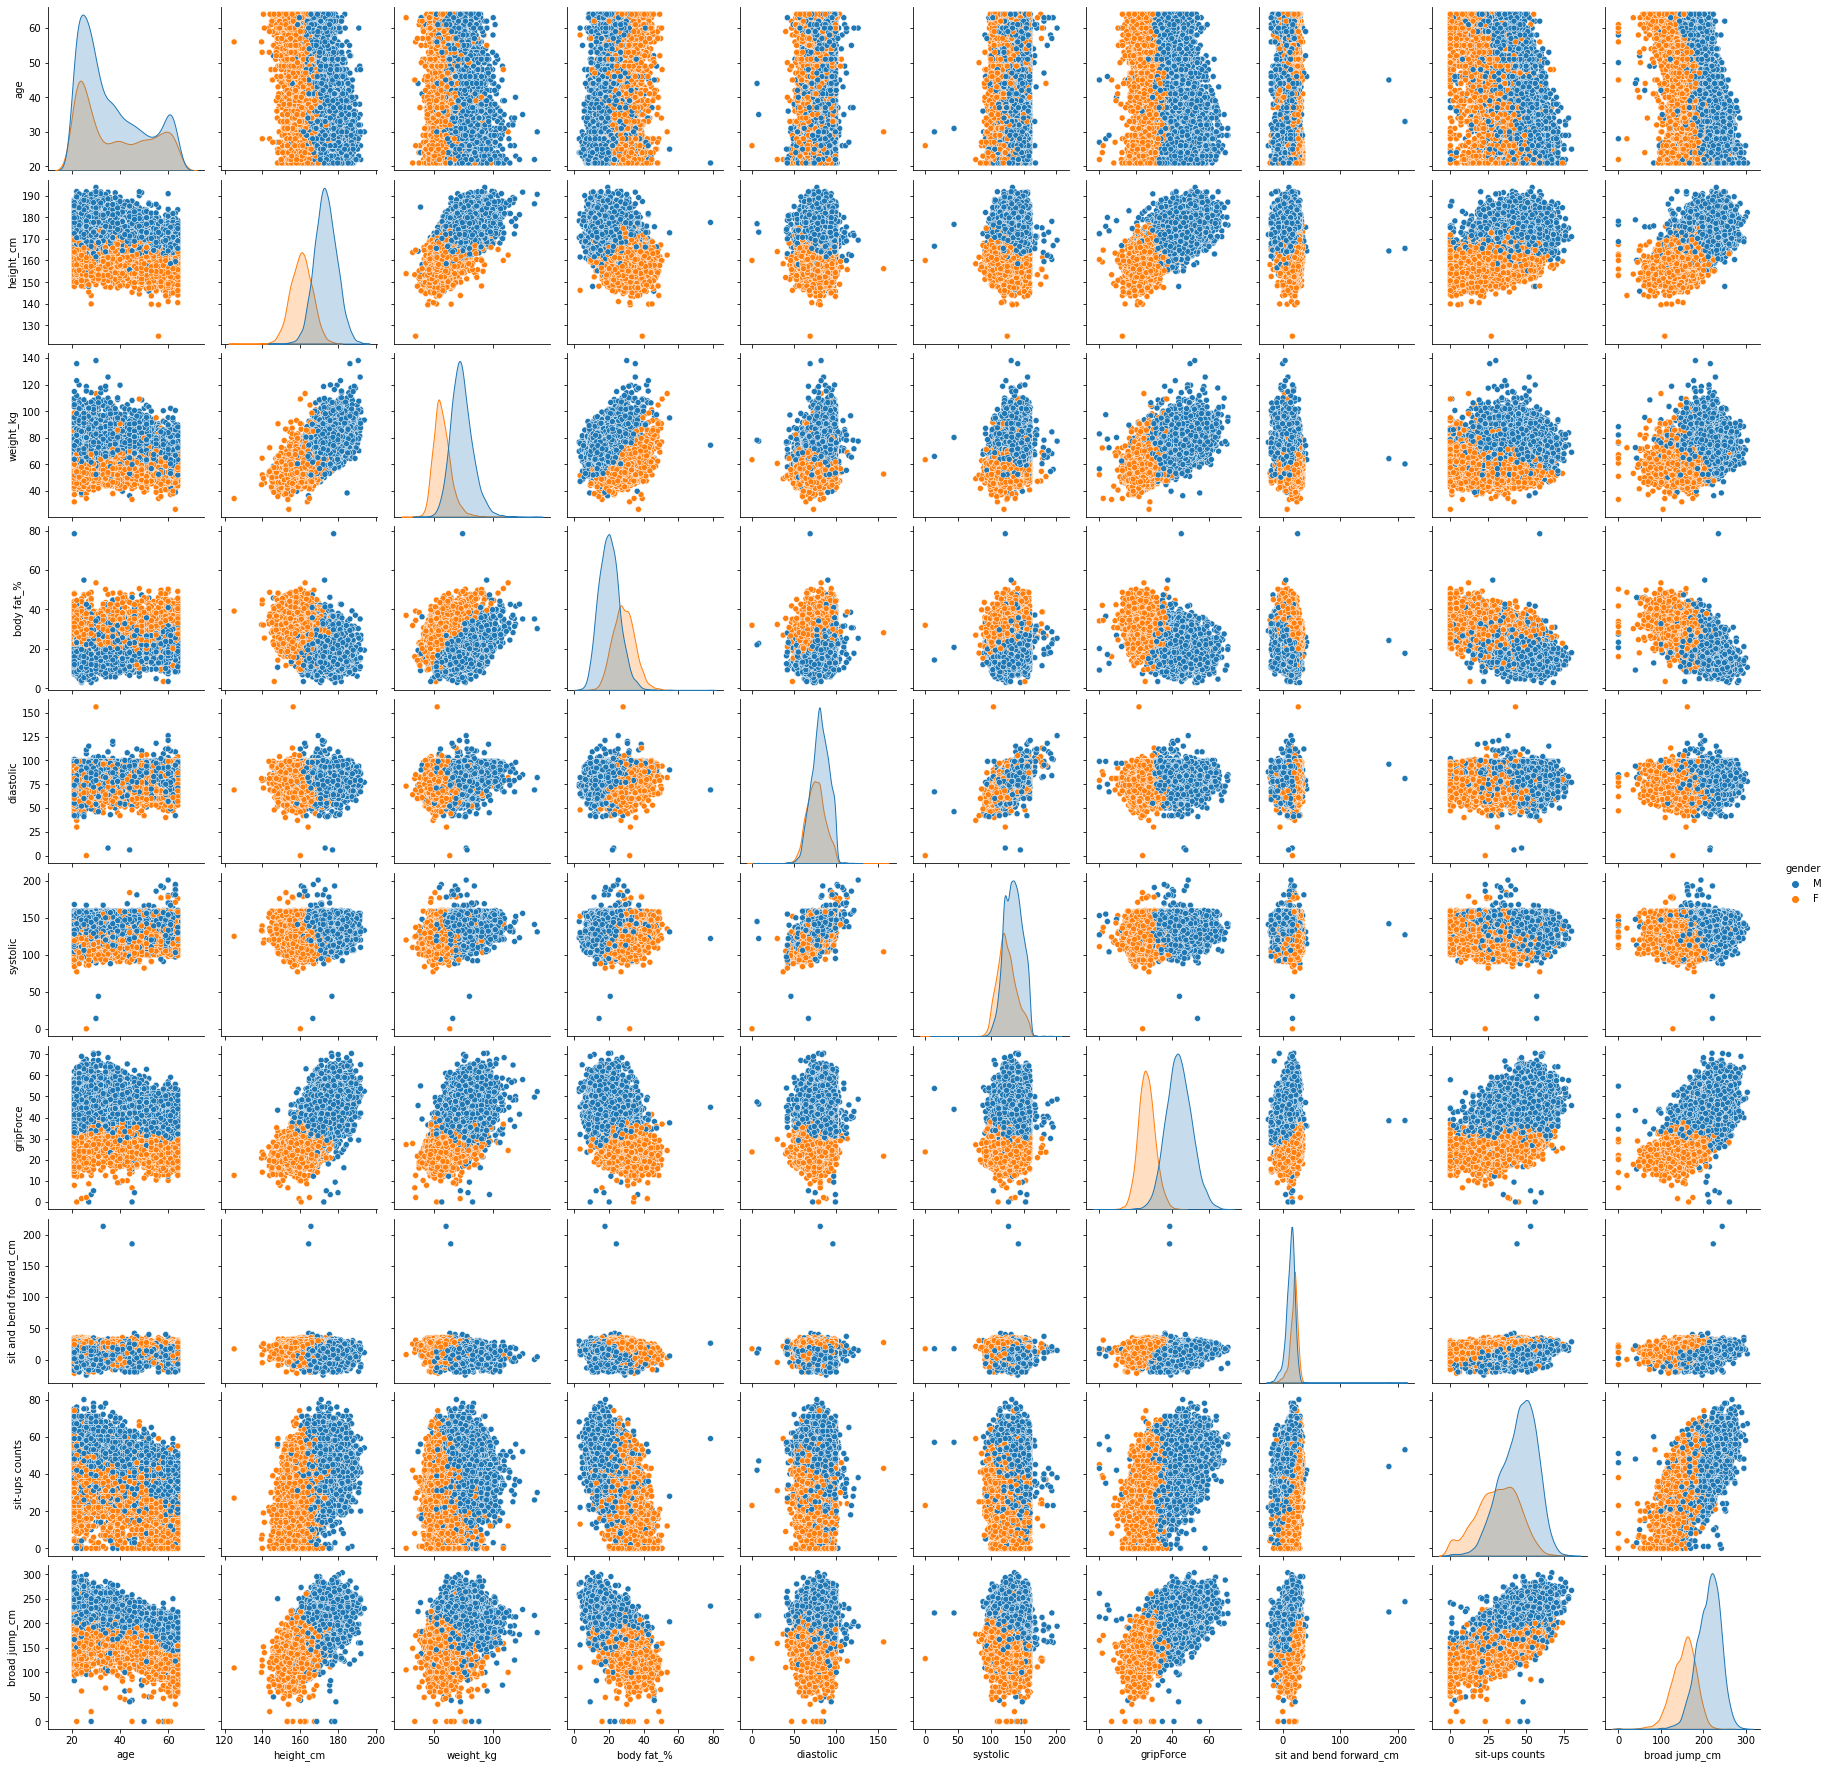

In [13]:
body_perf_df.drop(['class_encode', 'gender_encode'], axis=1, inplace=True)
sns.pairplot(body_perf_df, hue='gender')

From pairplot we can see that some variables do not have correlation with others. For example, 'sit and bend forward_cm' variable seem to be around the same number no matter the differences in other variables.

Исходя из построенных график, можно отметить, что некоторые показатели не слишком коррелируются с остальными. Например, показатель 'sit and bend forward_cm' примерно одинаков для дата поинтов, несмотря на различия в других показателях.

Let's plot correlation matrix

Для наглядности, давайте нарисуем корреляционную матрицу.

<AxesSubplot:>

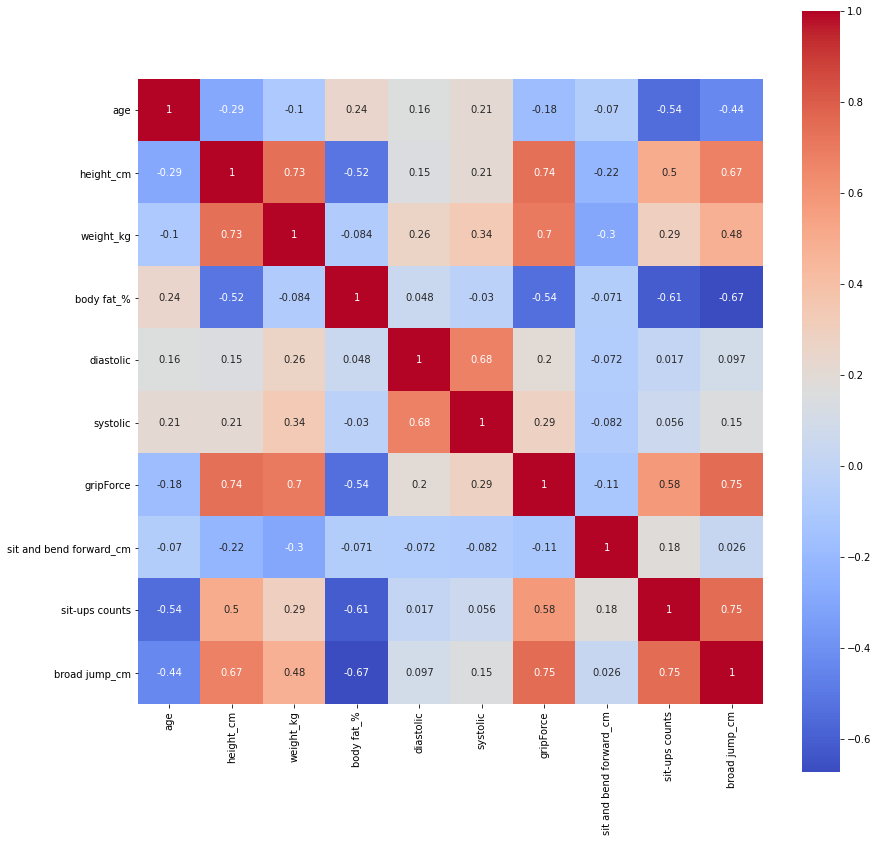

In [14]:
corr = body_perf_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True,cmap= 'coolwarm') 

From correlation map we can also see that 'sit and bend forward_cm' also has almost no correlation with other.
Also, notably blood pressures (systolic and diastolic) seem to not be correlated with any physical appearances variables or physical performance variables, but somewhat highly correlated to each other.
Another thing to notice is that height and weight seem to be strongly positevily correlated with each other as well as physical performance variables (except, 'sit and bend forward_cm').
Most negatively correlated values seem to be 'body fat_%' and 'age', both negatively correlating with physical appearances as well as performance variables.

На корреляционной матрице также видно, что показатель 'sit and bend forward_cm' практически никак не коррелируется с остальными.
Также стоит отметить, что показатели кровяного давления не коррелируются ни с какими показателями кроме себя самих (в датасете присутствуют данные для систилического и диастолического кровяного давления).
Корреляционная матрица также показывает, что показатели высоты и веса среди дата поинтов сильно положительно коррелируются между собой, а также с показателями физической активности (за исключеением 'sit and bend forward_cm')
Наиболее негативно коррелируюемым показателей являются 'body fat_%' и 'age'. Каждый из них негативно коррелируется как с физическими показателями, так и с показателями физической активности.

Let's take a look at the summary table now.

Посмотрим на сводную таблицу по нашему датасету.

In [15]:
body_perf_df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


Blood pressures and height and weight seem to have the least amplitude, so I would assume that data points were included in this data set upon these variables. Let's first take a look at blood pressures.

Кровяное давление и показатели роста/веса имеют наименьшую амлитуду распределения, так что я предположу, что по этим показателям проводился отбор испытуемых для используемого датасета. Давайте для начала посмотрим на кровяное давление.

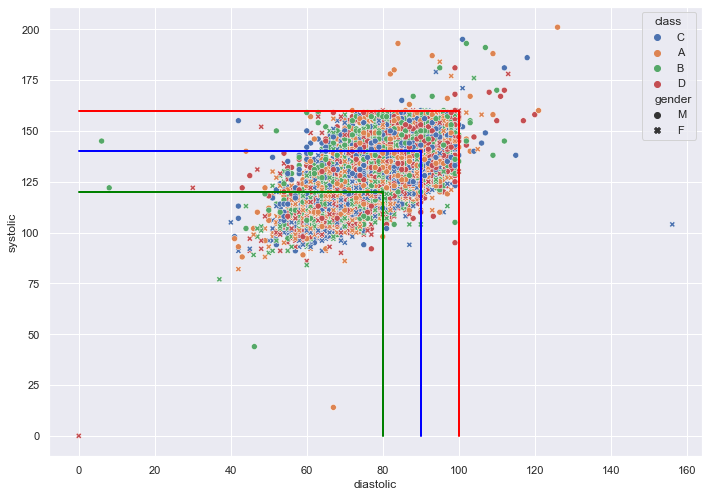

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(body_perf_df['diastolic'], body_perf_df['systolic'], hue=body_perf_df['class'], style=body_perf_df['gender'])
# normal systolic/diastolic
plt.plot([80, 80], [120, 0], linewidth=2, color='green')
plt.plot([0, 80], [120, 120], linewidth=2, color='green')
# hypertension stage 1
# гипертония 1 уровня
plt.plot([90,90], [140, 0], linewidth=2, color='blue')
plt.plot([0,90], [140,140], linewidth=2, color='blue')
# hypertension stage 2
plt.plot([100,100], [160,0], linewidth=2, color='red')
plt.plot([0,100], [160,160], linewidth=2, color='red')

Before analyzing the data plot shows us, let's clean it up a bit. I'm going to assign mean values of blood pressure for data point with (0,0), because I think this is just a mistake made, when filling in the tables. Data point is there, just the data is missing.
On the other hand, I'm going to kick out outliers, because data point with low systolic or diastolic pressure can actually exist, so these are possible real-people values, just outliers for our dataset.

Перед тем, как анализировать плот, я его немного поменяю. Я назначу средние показатели для дата поинта с показателями (0,0), так как я думаю, это просто ошибка заполнения таблицы при проведении замеров, а не реальные показатели.
Экстримальные же показатели (слишком низкие по одному показателю и одновременно слишком высокие по другому), я удалю, так как такие показатели действительно могут встречаться у реальных людей, однако они мешают нас при визуализации.

In [19]:
count_diastolic = 0
count_systolic = 0
for i in body_perf_df['diastolic']:
    if i == 0:
        count_diastolic +=1

for i in body_perf_df['systolic']:
    if i==0:
        count_systolic +=1
        
print('diastolic: ', count_diastolic, 'systolic: ', count_systolic)

diastolic:  1 systolic:  1


In [20]:
body_perf_df['diastolic'] = body_perf_df['diastolic'].replace(0, body_perf_df['diastolic'].mean())
body_perf_df['systolic'] = body_perf_df['systolic'].replace(0, body_perf_df['diastolic'].mean())

In [21]:
count_diastolic = 0
count_systolic = 0
for i in body_perf_df['diastolic']:
    if i == 0:
        count_diastolic +=1

for i in body_perf_df['systolic']:
    if i==0:
        count_systolic +=1
        
print('diastolic: ', count_diastolic, 'systolic: ', count_systolic)

diastolic:  0 systolic:  0


In [22]:
body_perf_df.drop(body_perf_df[body_perf_df['systolic'] < 60].index, inplace=True)
body_perf_df.drop(body_perf_df[body_perf_df['diastolic'] > 140].index, inplace=True)
body_perf_df.drop(body_perf_df[body_perf_df['diastolic'] < 50].index, inplace=True)

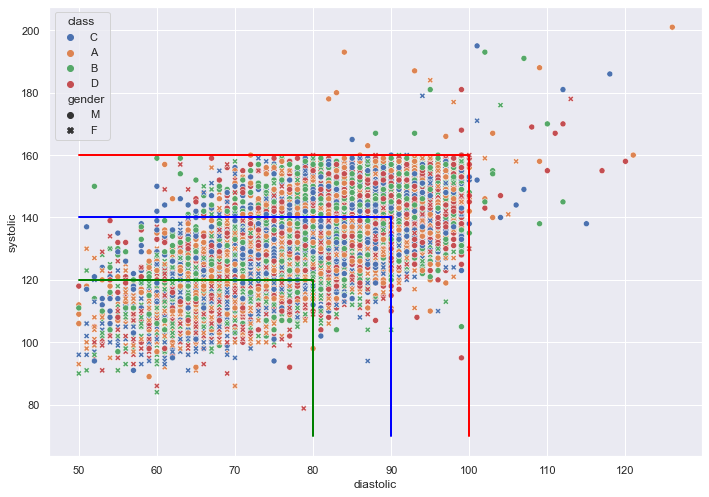

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(body_perf_df['diastolic'], body_perf_df['systolic'], hue=body_perf_df['class'], style=body_perf_df['gender'])
# normal systolic/diastolic
# нормальное кровяное давление
plt.plot([80, 80], [120, 70], linewidth=2, color='green')
plt.plot([50, 80], [120, 120], linewidth=2, color='green')
# hypertension stage 1
# гипертония 1 уровня
plt.plot([90,90], [140, 70], linewidth=2, color='blue')
plt.plot([50,90], [140,140], linewidth=2, color='blue')
# hypertension stage 2
# гипертония 2 уровня
plt.plot([100,100], [160, 70], linewidth=2, color='red')
plt.plot([50,100], [160,160], linewidth=2, color='red')

Now we can get to analysis. I plotted onto the graph two lines: green for marking normal blood pressure levels, blue for marking hypertenstion stage 1 and red for marking hypertension stage 2 level. 
As we can see, most of data points are in between these two lines, so I will assume group of people around the hypertension stage 1 blood pressure levels was the target of this experiment. 
Nonetheless, let's run a statistical test to make sure.

Теперь этот график можно анализировать. Помимо расположения дата поинтов по систолическому и диасталическому давлению, я также добавила на график линии: зеленая для нормальных уровней кровяного давления, синего для гипертонии 1 уровня,
красного для гипертонии 2 уровня. На графике видно, что большая часть дата поинтов расположена между нормальными уровнями и уровнями гипертонии 2 уровня. Исходя из этого, я предполагаю, что данная группа людей (с показателями
кровяного давления примерно на гипертонии 1 уровня были целевой группой).
Тем не менее, давайте проведем статистический тест, чтобы быть уверенными.

**H0**: mean diastolic is **not** around 90.

**H1**: mean diastolic is around 90.

**H0**: среднее диастолическое давление **не** на уровне 90.

**H1**: среднее диастолическое давление на уровне 90.

In [24]:
dias = ttest_1samp(body_perf_df['diastolic'], 90).pvalue

prob = 0.95

alpha = 1.0 - prob

print('The alpha/significance level = %.2f' % alpha)

print('The p-value is = %.2f' % dias)

if dias <= alpha:
    print('Reject the Null Hypothesis (Reject H0)')
else:
    print('Accept the Null Hypothesis (Do not reject H0)')

The alpha/significance level = 0.05
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0)


We reject H0. Mean diastolic is around 90.

Мы отвергаем H0. Среднее диастолическое давление между дата поинтами 90.

**H0**: mean systolic is **not** around 140.

**H1**: mean systolic is around 140.

**H0**: среднее систолическое давление **не** на уровне 140.

**H1**: среднее систолическое давление на уровне 140.

In [25]:
syst = ttest_1samp(body_perf_df['systolic'], 140).pvalue

prob = 0.95

alpha = 1.0 - prob

print('The alpha/significance level = %.2f' % alpha)

print('The p-value is = %.2f' % syst)

if syst <= alpha:
    print('Reject the Null Hypothesis (Reject H0)')
else:
    print('Accept the Null Hypothesis (Do not reject H0)')

The alpha/significance level = 0.05
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0)


We reject H0. Mean diastolic is around 140.

Мы отвергаем H0. Среднее систолическое давление между дата поинтами 140.

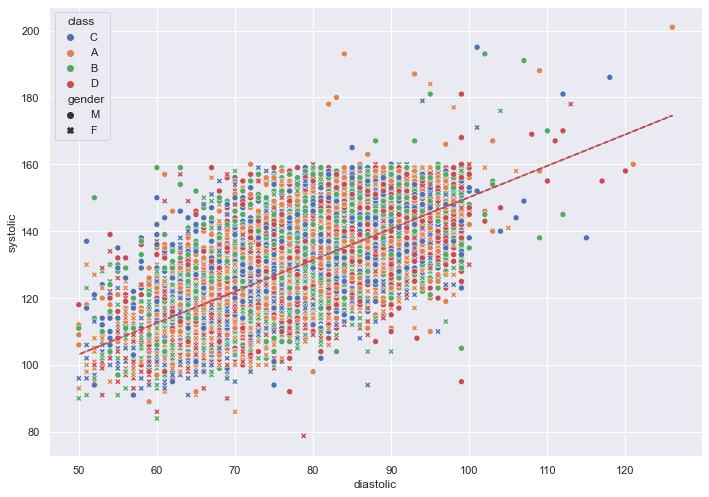

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(body_perf_df['diastolic'], body_perf_df['systolic'], hue=body_perf_df['class'], style=body_perf_df['gender'])

# Let's plot trend line.
# Нарисуем линию тренда.
z = np.polyfit(body_perf_df['diastolic'], body_perf_df['systolic'], 1)
p = np.poly1d(z)
plt.plot(body_perf_df['diastolic'],p(body_perf_df['diastolic']),"r--")

Once again, trend line proves correlation between two variables.

Линия тренда еще раз показывает корреляцию между двумя показателями.

As a final thing let's see which variables differ the the most between classes. 

Наконец, давайте проверим каким показатели различаются больше всего между классами.

In [29]:
body_perf_df.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class', 'class_encode', 'gender_encode'],
      dtype='object')

In [33]:
grouped_df = body_perf_df.groupby(body_perf_df['class'])
mean_df = grouped_df.mean()
mean_df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
class,,,,,,,,,,
A,35.297151,167.865727,64.419214,20.555624,78.022909,129.424288,38.603130,21.387697,47.832984,202.681859
B,37.091454,168.590315,66.623739,22.032329,78.798501,130.745127,37.923637,17.467949,42.643898,195.364348
C,36.698893,169.172852,66.779793,22.647215,78.604011,129.977552,36.595133,14.388707,38.723137,188.658785
D,38.056022,168.650659,72.034757,27.739354,80.215727,131.169504,34.773367,7.588730,29.890833,173.937388


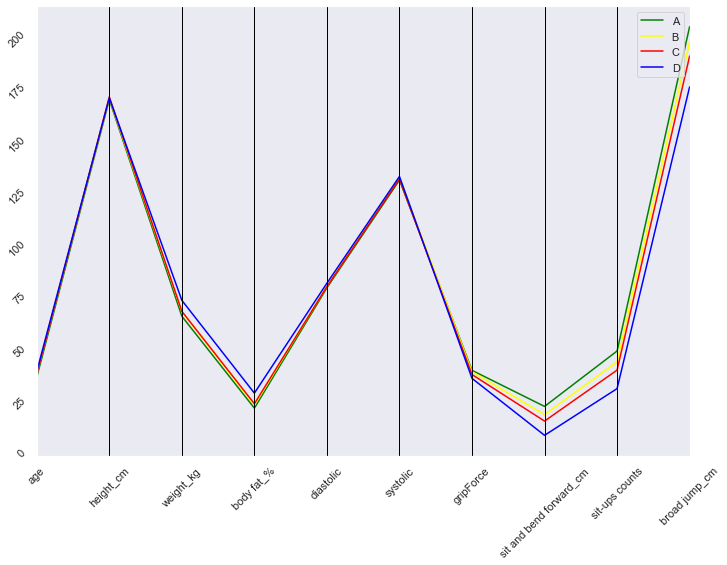

In [34]:
mean_df.reset_index(inplace=True)
axis = pd.plotting.parallel_coordinates(mean_df, 'class', color=['green', 'yellow', 'red', 'blue'])
axis.tick_params(labelrotation=45)

Classes seem to be most distinct in physical performance variables, such as 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'. Classes also differ, though not to the same degree, in 'weight_kg' and 'body far_%' variables.

Классы в датасете различаются по показателям физической активности, таким как 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'. Классы также различаются, хотя и не так сильно, по 'weight_kg' и 'body far_%' показателям.